In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [41]:
# Read CSV files for each country
data_benin_malanville = pd.read_csv('../data/benin-malanville.csv')
data_sierraleone_bumbuna = pd.read_csv('../data/sierraleone-bumbuna.csv')
data_togo_dapaong_qc = pd.read_csv('../data/togo-dapaong_qc.csv')

In [26]:
# Convert 'Timestamp' column to datetime format
data_benin_malanville['Timestamp'] = pd.to_datetime(data_benin_malanville['Timestamp'])
data_sierraleone_bumbuna['Timestamp'] = pd.to_datetime(data_sierraleone_bumbuna['Timestamp'])
data_togo_dapaong_qc['Timestamp'] = pd.to_datetime(data_togo_dapaong_qc['Timestamp'])

In [27]:
# Set 'Timestamp' column as index
data_benin_malanville.set_index('Timestamp', inplace=True)
data_sierraleone_bumbuna.set_index('Timestamp', inplace=True)
data_togo_dapaong_qc.set_index('Timestamp', inplace=True)

In [28]:
# Resample data on a monthly basis and aggregate using mean
data_benin_malanville_monthly = data_benin_malanville.resample('ME').mean()
data_sierraleone_bumbuna_monthly = data_sierraleone_bumbuna.resample('ME').mean()
data_togo_dapaong_qc_monthly = data_togo_dapaong_qc.resample('ME').mean()

In [29]:
# Calculate summary statistics for each country
summary_stats_benin_malanville= data_benin_malanville.describe()
summary_stats_sierraleone_bumbuna= data_sierraleone_bumbuna.describe()
summary_stats_togo_dapaong_qc = data_togo_dapaong_qc.describe()


print("Summary Statistics for Benin_malanville:\n", summary_stats_benin_malanville)
print("\nSummary Statistics for Sierraleone_bumbuna:\n", summary_stats_sierraleone_bumbuna)
print("\nSummary Statistics for Togo_dapaong_qc:\n", summary_stats_togo_dapaong_qc)

Summary Statistics for Benin_malanville:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.0

In [30]:
# Check for missing values for each country
missing_values_benin_malanville = data_benin_malanville.isnull().sum()
missing_values_sierraleone_bumbuna = data_sierraleone_bumbuna.isnull().sum()
missing_values_togo_dapaong_qc = data_togo_dapaong_qc.isnull().sum()

print("Missing Values for Benin_malanville:\n", missing_values_benin_malanville)
print("\nMissing Values for Sierraleone_bumbuna:\n", missing_values_sierraleone_bumbuna)
print("\nMissing Values for Togo_dapaong_qc:\n", missing_values_togo_dapaong_qc)

# Check for outliers (e.g., negative values) for each country
negative_values_benin_malanville = data_benin_malanville.loc[:, data_benin_malanville.columns != 'Timestamp'].lt(0).sum()
negative_values_sierraleone_bumbuna = data_sierraleone_bumbuna.loc[:, data_sierraleone_bumbuna.columns != 'Timestamp'].lt(0).sum()
negative_values_togo_dapaong_qc = data_togo_dapaong_qc.loc[:, data_togo_dapaong_qc.columns != 'Timestamp'].lt(0).sum()

print("\nNegative Values for Benin_malanville:\n", negative_values_benin_malanville)
print("\nNegative Values for Sierraleone_bumbuna):\n", negative_values_sierraleone_bumbuna)
print("\nNegative Values for Togo_dapaong_qc:\n", negative_values_togo_dapaong_qc)


Missing Values for Benin_malanville:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Missing Values for Sierraleone_bumbuna:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Missing Values for Togo_dapao

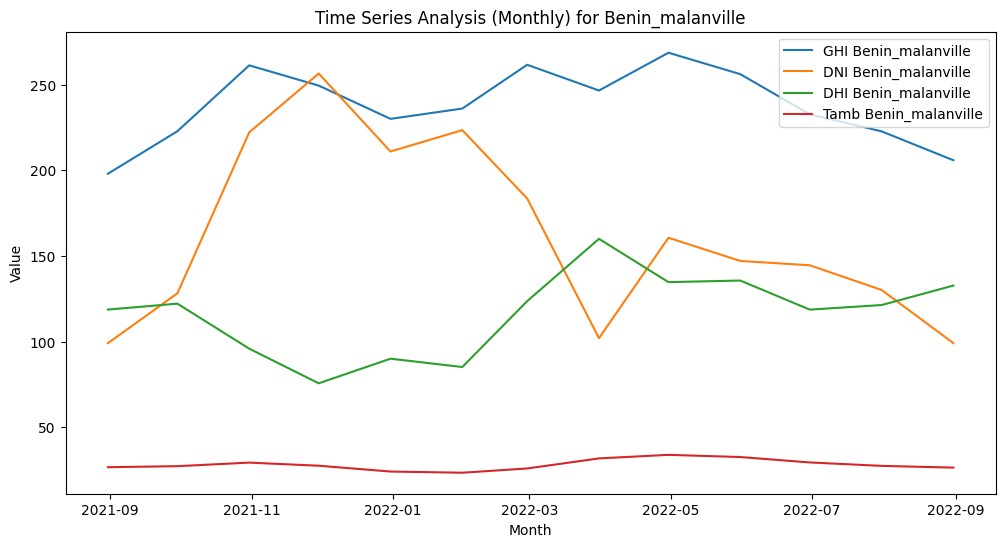

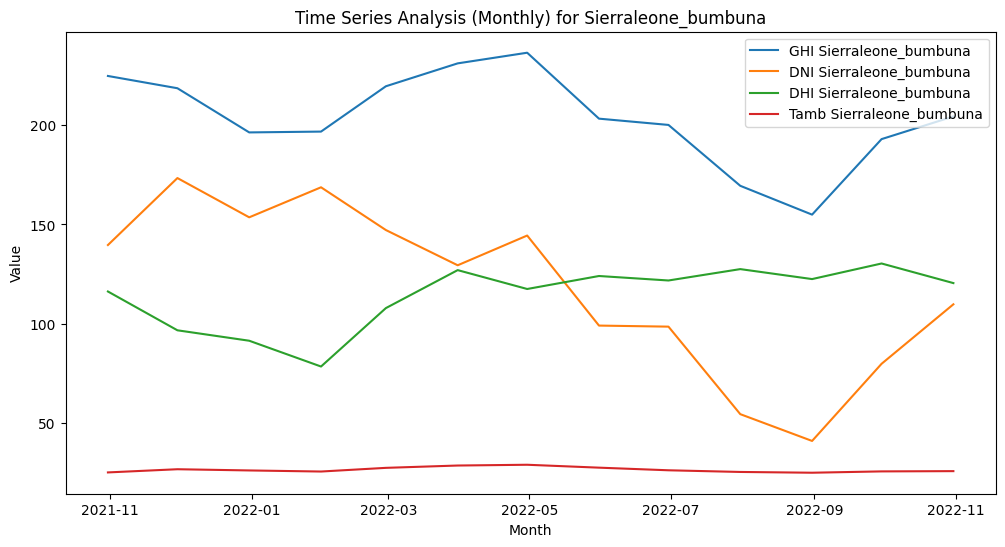

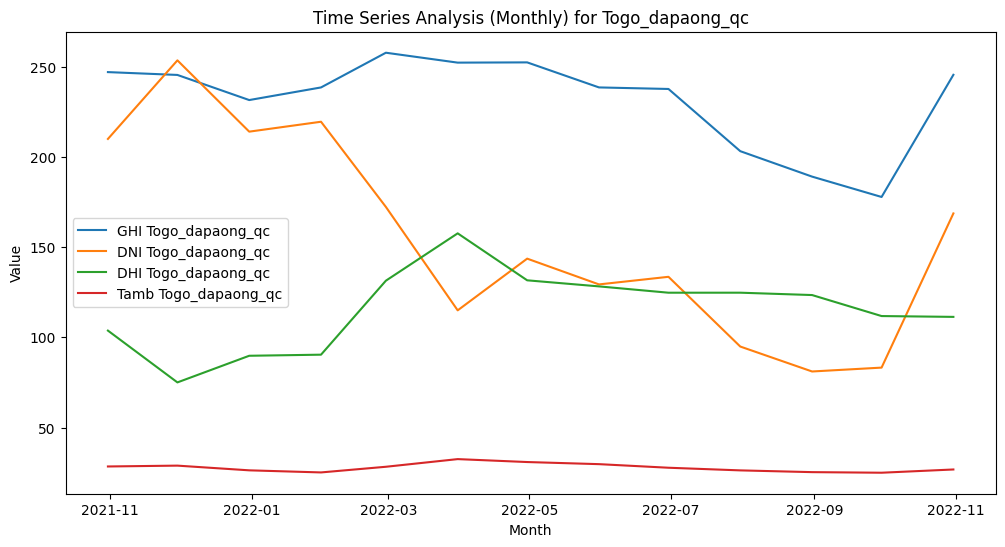

In [31]:
import matplotlib.pyplot as plt

# Plot Time Series Analysis (Monthly)
plt.figure(figsize=(12, 6))
plt.plot(data_benin_malanville_monthly.index, data_benin_malanville_monthly['GHI'], label='GHI Benin_malanville')
plt.plot(data_benin_malanville_monthly.index, data_benin_malanville_monthly['DNI'], label='DNI Benin_malanville')
plt.plot(data_benin_malanville_monthly.index, data_benin_malanville_monthly['DHI'], label='DHI Benin_malanville')
plt.plot(data_benin_malanville_monthly.index, data_benin_malanville_monthly['Tamb'], label='Tamb Benin_malanville')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Time Series Analysis (Monthly) for Benin_malanville')
plt.legend()
plt.show()

# Plot Time Series Analysis (Monthly)
plt.figure(figsize=(12, 6))
plt.plot(data_sierraleone_bumbuna_monthly.index, data_sierraleone_bumbuna_monthly['GHI'], label='GHI Sierraleone_bumbuna')
plt.plot(data_sierraleone_bumbuna_monthly.index, data_sierraleone_bumbuna_monthly['DNI'], label='DNI Sierraleone_bumbuna')
plt.plot(data_sierraleone_bumbuna_monthly.index, data_sierraleone_bumbuna_monthly['DHI'], label='DHI Sierraleone_bumbuna')
plt.plot(data_sierraleone_bumbuna_monthly.index, data_sierraleone_bumbuna_monthly['Tamb'], label='Tamb Sierraleone_bumbuna')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Time Series Analysis (Monthly) for Sierraleone_bumbuna')
plt.legend()
plt.show()

# Plot Time Series Analysis (Monthly)
plt.figure(figsize=(12, 6))
plt.plot(data_togo_dapaong_qc_monthly.index, data_togo_dapaong_qc_monthly['GHI'], label='GHI Togo_dapaong_qc')
plt.plot(data_togo_dapaong_qc_monthly.index, data_togo_dapaong_qc_monthly['DNI'], label='DNI Togo_dapaong_qc')
plt.plot(data_togo_dapaong_qc_monthly.index, data_togo_dapaong_qc_monthly['DHI'], label='DHI Togo_dapaong_qc')
plt.plot(data_togo_dapaong_qc_monthly.index, data_togo_dapaong_qc_monthly['Tamb'], label='Tamb Togo_dapaong_qc')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Time Series Analysis (Monthly) for Togo_dapaong_qc')
plt.legend()
plt.show()


In [32]:
# Calculate correlation matrix for each country
correlation_matrix_benin_malanville = data_benin_malanville.corr()
correlation_matrix_sierraleone_bumbuna = data_sierraleone_bumbuna.corr()
correlation_matrix_togo_dapaong_qc = data_togo_dapaong_qc.corr()

print("Correlation Matrix for Benin_malanville:\n", correlation_matrix_benin_malanville)
print("\nCorrelation Matrix for Sierraleone_bumbuna:\n", correlation_matrix_sierraleone_bumbuna)
print("\nCorrelation Matrix for Togo_dapaong_qc:\n", correlation_matrix_togo_dapaong_qc)


Correlation Matrix for Benin_malanville:
                     GHI       DNI       DHI      ModA      ModB      Tamb  \
GHI            1.000000  0.882376  0.849989  0.994443  0.994869  0.547513   
DNI            0.882376  1.000000  0.546602  0.892023  0.892012  0.467584   
DHI            0.849989  0.546602  1.000000  0.829923  0.827886  0.503925   
ModA           0.994443  0.892023  0.829923  1.000000  0.998745  0.526868   
ModB           0.994869  0.892012  0.827886  0.998745  1.000000  0.525370   
Tamb           0.547513  0.467584  0.503925  0.526868  0.525370  1.000000   
RH            -0.360029 -0.373475 -0.285018 -0.383205 -0.365718 -0.414842   
WS             0.457349  0.397099  0.426959  0.458483  0.450123  0.347188   
WSgust         0.484144  0.419469  0.450904  0.484429  0.476380  0.362403   
WSstdev        0.446526  0.383303  0.414711  0.443467  0.438523  0.342418   
WD             0.079664  0.018839  0.102752  0.050262  0.061473  0.188081   
WDstdev        0.547242  0.471152 

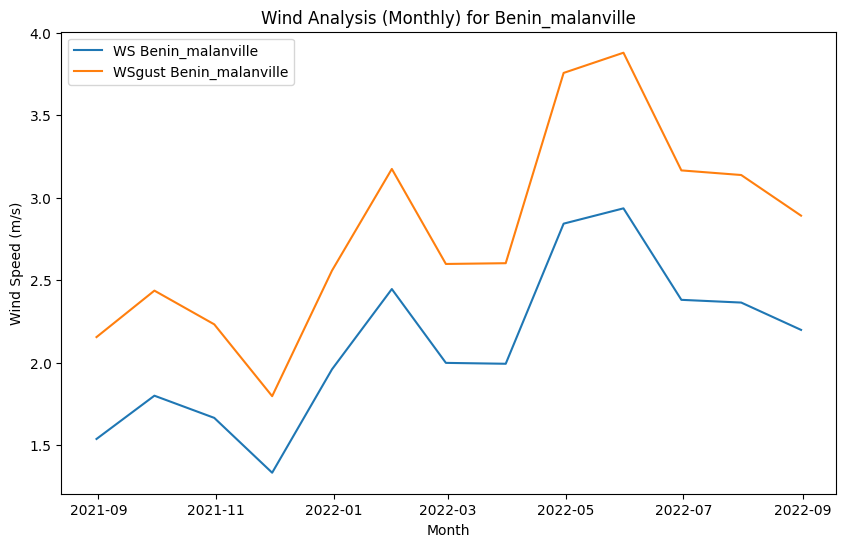

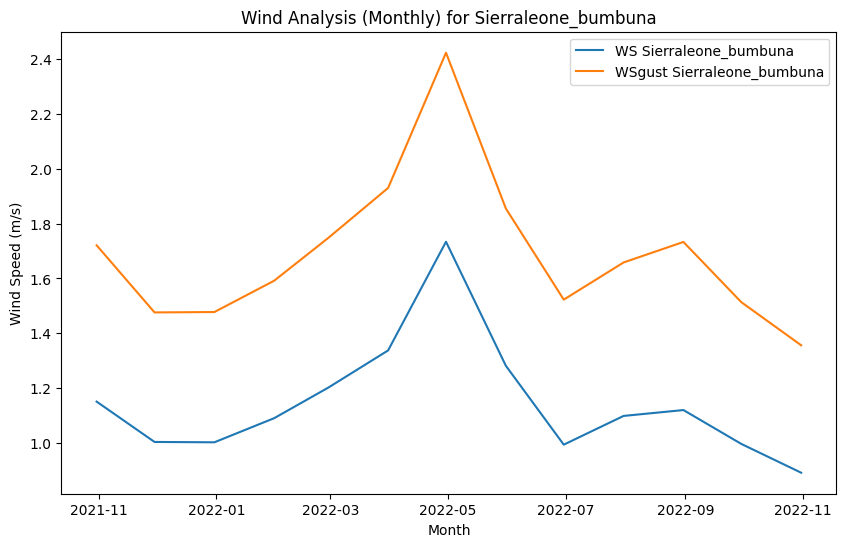

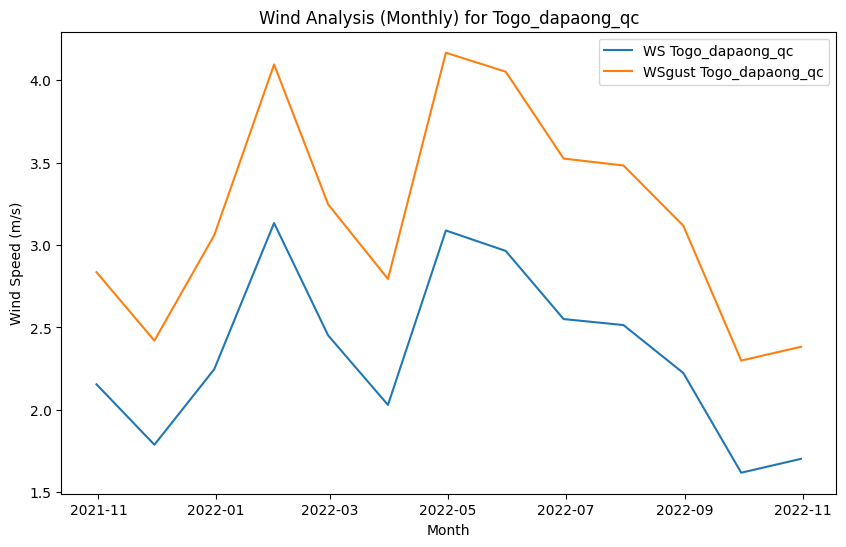

In [33]:
# Wind Analysis country1
plt.figure(figsize=(10, 6))
plt.plot(data_benin_malanville_monthly.index, data_benin_malanville_monthly['WS'], label='WS Benin_malanville')
plt.plot(data_benin_malanville_monthly.index, data_benin_malanville_monthly['WSgust'], label='WSgust Benin_malanville')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Analysis (Monthly) for Benin_malanville')
plt.legend()
plt.show()

# Wind Analysis Sierraleone_bumbuna
plt.figure(figsize=(10, 6))
plt.plot(data_sierraleone_bumbuna_monthly.index, data_sierraleone_bumbuna_monthly['WS'], label='WS Sierraleone_bumbuna')
plt.plot(data_sierraleone_bumbuna_monthly.index, data_sierraleone_bumbuna_monthly['WSgust'], label='WSgust Sierraleone_bumbuna')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Analysis (Monthly) for Sierraleone_bumbuna')
plt.legend()
plt.show()

# Wind Analysis for country3
plt.figure(figsize=(10, 6))
plt.plot(data_togo_dapaong_qc_monthly.index, data_togo_dapaong_qc_monthly['WS'], label='WS Togo_dapaong_qc')
plt.plot(data_togo_dapaong_qc_monthly.index, data_togo_dapaong_qc_monthly['WSgust'], label='WSgust Togo_dapaong_qc')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Analysis (Monthly) for Togo_dapaong_qc')
plt.legend()
plt.show()


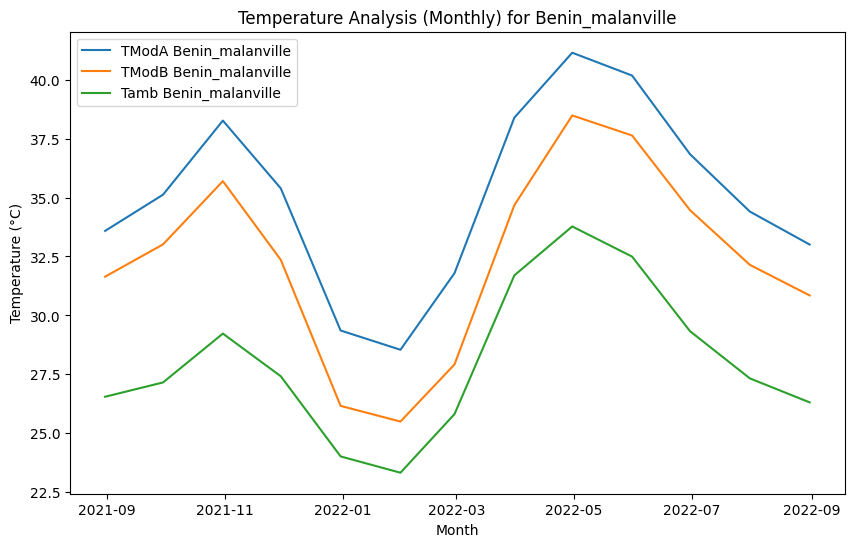

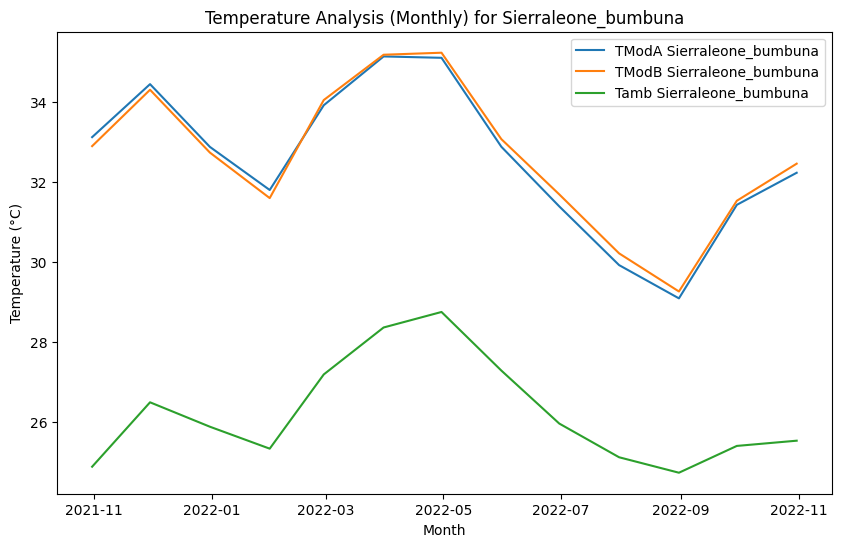

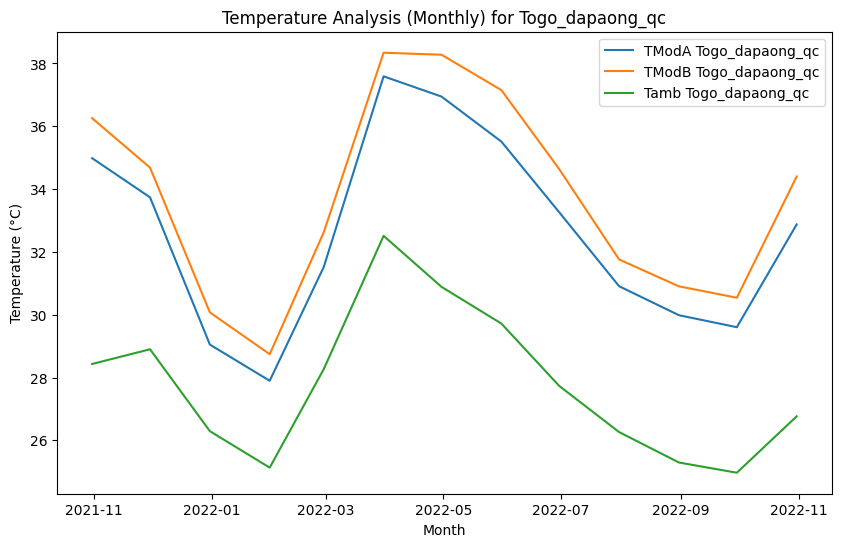

In [34]:
# Temperature Analysis
plt.figure(figsize=(10, 6))
plt.plot(data_benin_malanville_monthly.index, data_benin_malanville_monthly['TModA'], label='TModA Benin_malanville')
plt.plot(data_benin_malanville_monthly.index, data_benin_malanville_monthly['TModB'], label='TModB Benin_malanville')
plt.plot(data_benin_malanville_monthly.index, data_benin_malanville_monthly['Tamb'], label='Tamb Benin_malanville')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Analysis (Monthly) for Benin_malanville')
plt.legend()
plt.show()

# Temperature Analysis
plt.figure(figsize=(10, 6))
plt.plot(data_sierraleone_bumbuna_monthly.index, data_sierraleone_bumbuna_monthly['TModA'], label='TModA Sierraleone_bumbuna')
plt.plot(data_sierraleone_bumbuna_monthly.index, data_sierraleone_bumbuna_monthly['TModB'], label='TModB Sierraleone_bumbuna')
plt.plot(data_sierraleone_bumbuna_monthly.index, data_sierraleone_bumbuna_monthly['Tamb'], label='Tamb Sierraleone_bumbuna')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Analysis (Monthly) for Sierraleone_bumbuna')
plt.legend()
plt.show()

# Temperature Analysis
plt.figure(figsize=(10, 6))
plt.plot(data_togo_dapaong_qc_monthly.index, data_togo_dapaong_qc_monthly['TModA'], label='TModA Togo_dapaong_qc')
plt.plot(data_togo_dapaong_qc_monthly.index, data_togo_dapaong_qc_monthly['TModB'], label='TModB Togo_dapaong_qc')
plt.plot(data_togo_dapaong_qc_monthly.index, data_togo_dapaong_qc_monthly['Tamb'], label='Tamb Togo_dapaong_qc')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Analysis (Monthly) for Togo_dapaong_qc')
plt.legend()
plt.show()


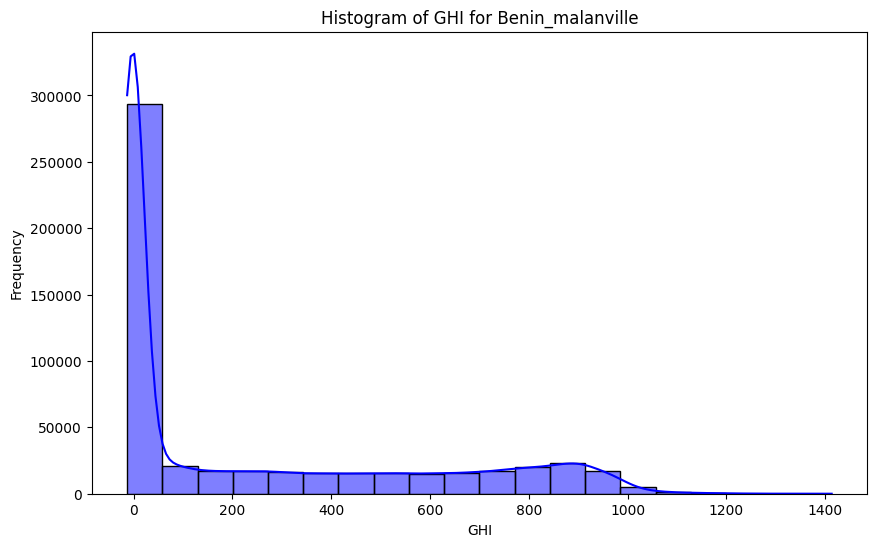

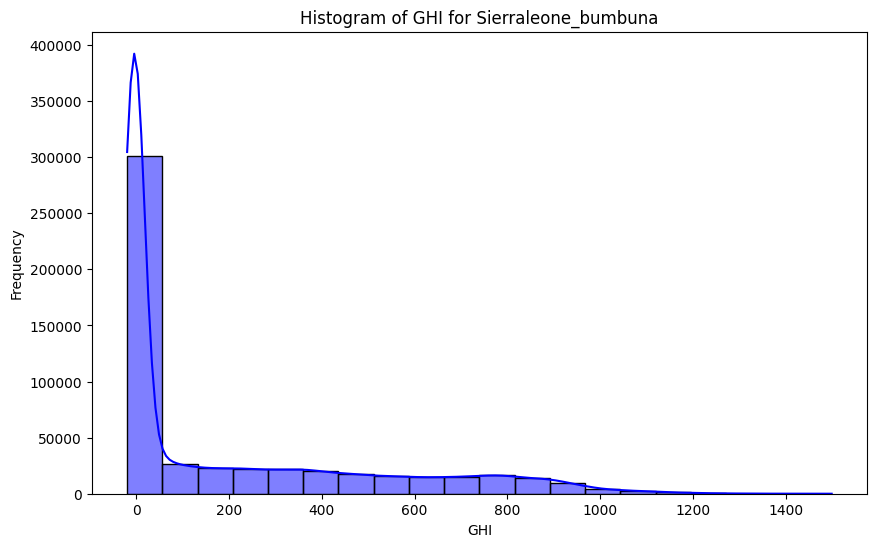

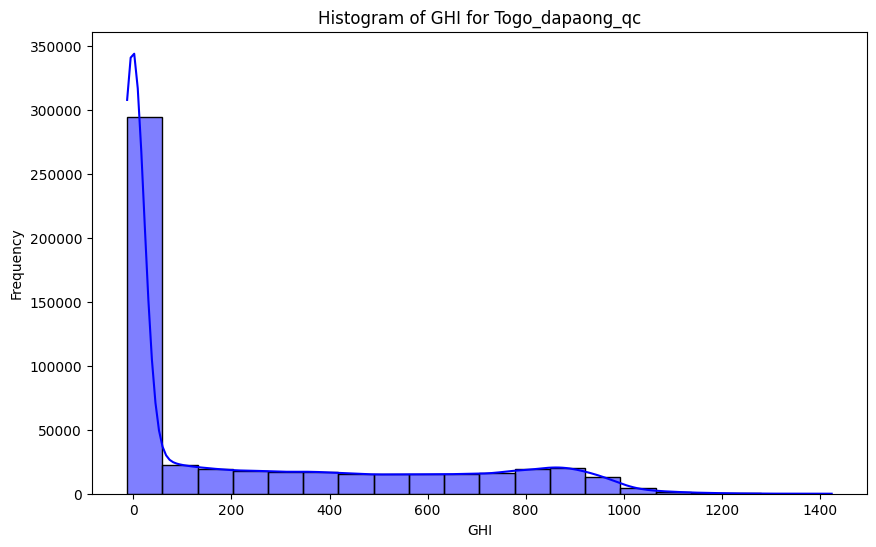

In [35]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=data_benin_malanville, x='GHI', bins=20, kde=True, color='blue')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.title('Histogram of GHI for Benin_malanville')
plt.show()

# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=data_sierraleone_bumbuna, x='GHI', bins=20, kde=True, color='blue')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.title('Histogram of GHI for Sierraleone_bumbuna')
plt.show()

# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=data_togo_dapaong_qc, x='GHI', bins=20, kde=True, color='blue')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.title('Histogram of GHI for Togo_dapaong_qc')
plt.show()

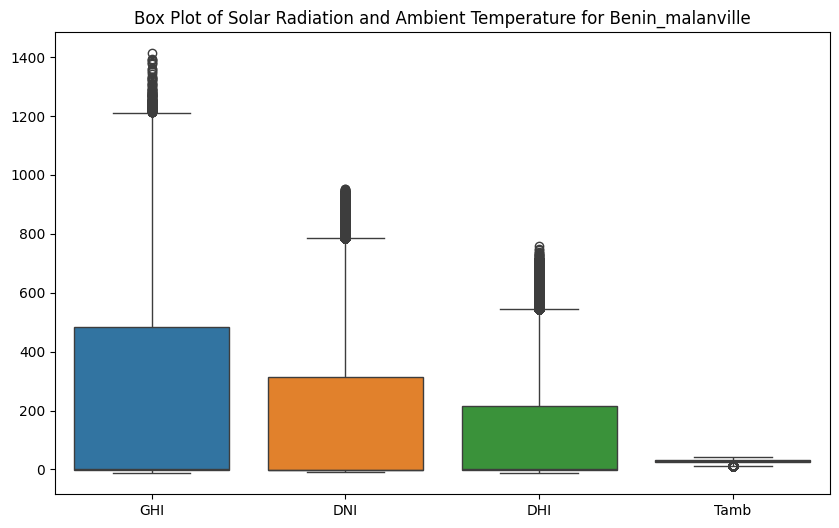

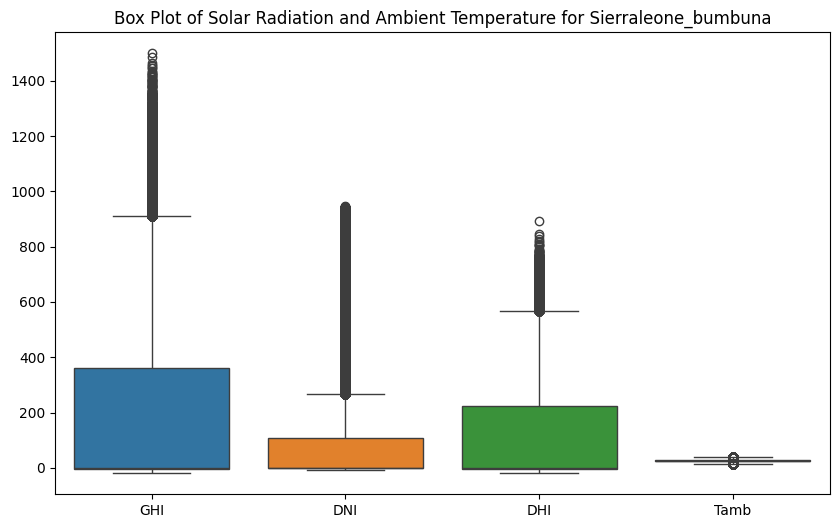

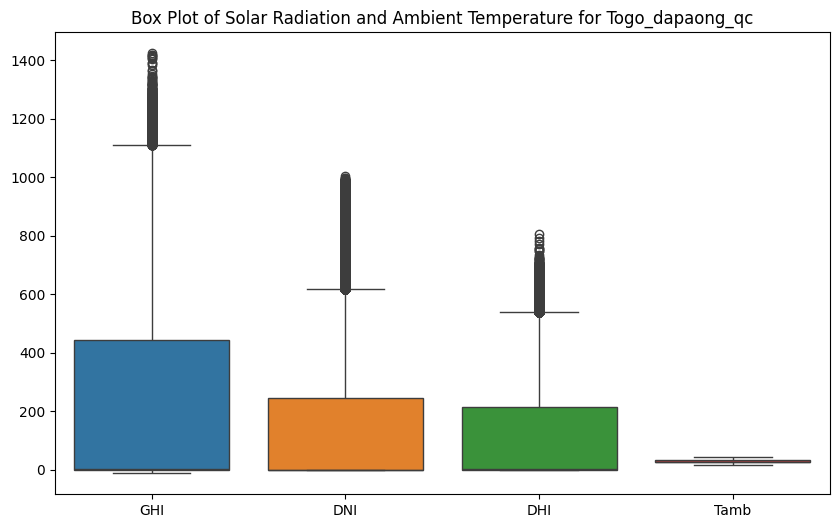

In [36]:
# Create box plots for each country
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_benin_malanville[['GHI', 'DNI', 'DHI', 'Tamb']])
plt.title('Box Plot of Solar Radiation and Ambient Temperature for Benin_malanville')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_sierraleone_bumbuna[['GHI', 'DNI', 'DHI', 'Tamb']])
plt.title('Box Plot of Solar Radiation and Ambient Temperature for Sierraleone_bumbuna')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_togo_dapaong_qc[['GHI', 'DNI', 'DHI', 'Tamb']])
plt.title('Box Plot of Solar Radiation and Ambient Temperature for Togo_dapaong_qc')
plt.show()


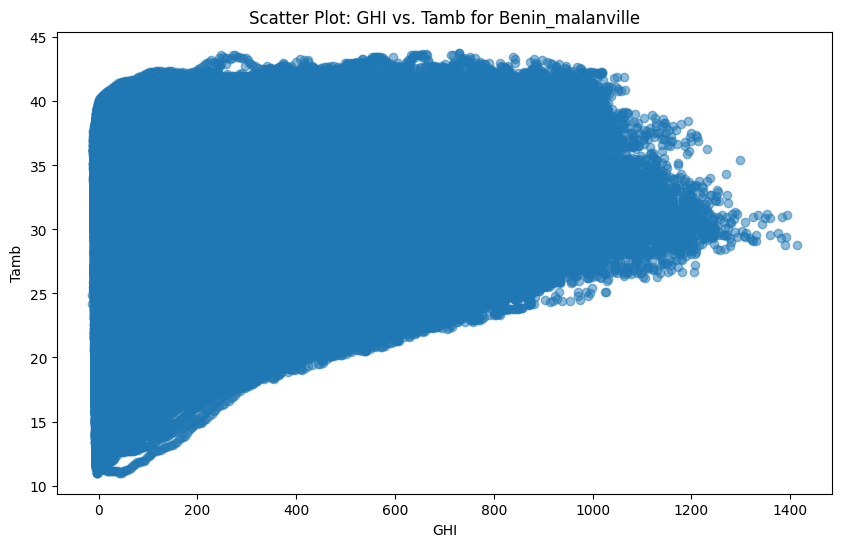

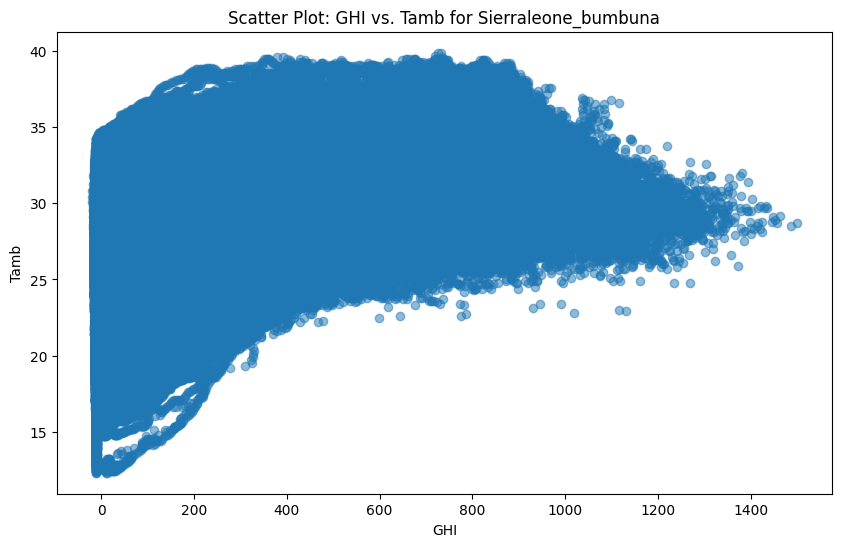

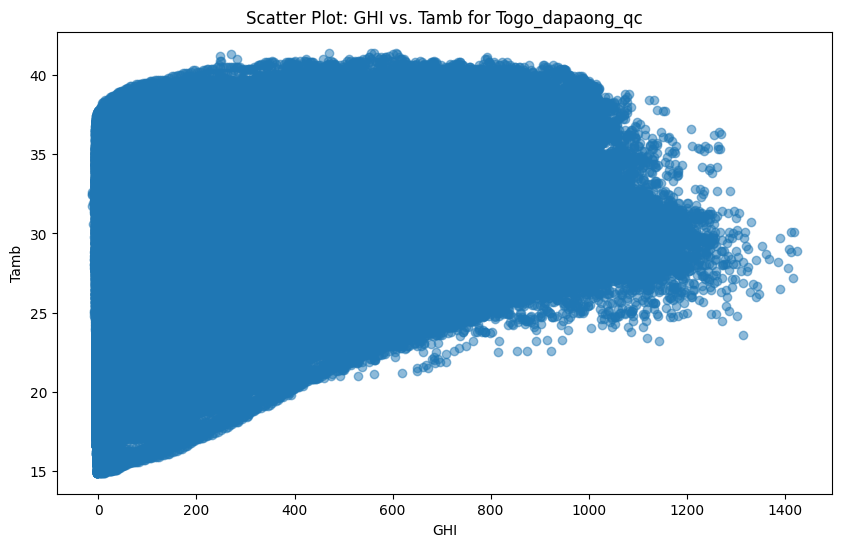

In [37]:
# Scatter Plots
plt.figure(figsize=(10, 6))
plt.scatter(data_benin_malanville['GHI'], data_benin_malanville['Tamb'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Scatter Plot: GHI vs. Tamb for Benin_malanville')
plt.show()

# Scatter Plots
plt.figure(figsize=(10, 6))
plt.scatter(data_sierraleone_bumbuna['GHI'], data_sierraleone_bumbuna['Tamb'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Scatter Plot: GHI vs. Tamb for Sierraleone_bumbuna')
plt.show()

# Scatter Plots
plt.figure(figsize=(10, 6))
plt.scatter(data_togo_dapaong_qc['GHI'], data_togo_dapaong_qc['Tamb'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Scatter Plot: GHI vs. Tamb for Togo_dapaong_qc')
plt.show()

In [38]:
# Data Cleaning Benin_malanville

print("Before data cleaning:")
print("Number of rows before cleaning:", len(data_benin_malanville))
print("Number of missing values:\n", data_benin_malanville.isnull().sum())
print("Number of negative GHI values:", (data_benin_malanville['GHI'] < 0).sum())

# Handle missing values country1
data_benin_malanville_cleaned = data_benin_malanville.dropna()

# Handle anomalies (e.g., negative values) country1
data_benin_malanville_cleaned = data_benin_malanville_cleaned[data_benin_malanville_cleaned['GHI'] >= 0]

print("\nAfter data cleaning:")
print("Number of rows after cleaning:", len(data_benin_malanville_cleaned))



Before data cleaning:
Number of rows before cleaning: 525600
Number of missing values:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Number of negative GHI values: 258847

After data cleaning:
Number of rows after cleaning: 0


In [39]:
# Data Cleaning Sierraleone_bumbuna

print("Before data cleaning:")
print("Number of rows before cleaning:", len(data_sierraleone_bumbuna))
print("Number of missing values:\n", data_sierraleone_bumbuna.isnull().sum())
print("Number of negative GHI values:", (data_sierraleone_bumbuna['GHI'] < 0).sum())

# Handle missing values
data_sierraleone_bumbuna_cleaned = data_sierraleone_bumbuna.dropna()

# Handle anomalies (e.g., negative values) Sierraleone_bumbuna
data_sierraleone_bumbuna_cleaned = data_sierraleone_bumbuna_cleaned[data_sierraleone_bumbuna_cleaned['GHI'] >= 0]

print("\nAfter data cleaning:")
print("Number of rows after cleaning:", len(data_sierraleone_bumbuna_cleaned))

Before data cleaning:
Number of rows before cleaning: 525600
Number of missing values:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Number of negative GHI values: 261135

After data cleaning:
Number of rows after cleaning: 0


In [40]:
# Data Cleaning Togo_dapaong_qc

print("Before data cleaning:")
print("Number of rows before cleaning:", len(data_togo_dapaong_qc))
print("Number of missing values:\n", data_togo_dapaong_qc.isnull().sum())
print("Number of negative GHI values:", (data_togo_dapaong_qc['GHI'] < 0).sum())

# Handle missing values
data_togo_dapaong_qc_cleaned = data_togo_dapaong_qc.dropna()

# Handle anomalies (e.g., negative values) country1
data_togo_dapaong_qc_cleaned = data_togo_dapaong_qc_cleaned[data_togo_dapaong_qc_cleaned['GHI'] >= 0]

print("\nAfter data cleaning:")
print("Number of rows after cleaning:", len(data_togo_dapaong_qc_cleaned))

Before data cleaning:
Number of rows before cleaning: 525600
Number of missing values:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Number of negative GHI values: 257385

After data cleaning:
Number of rows after cleaning: 0
